In [1]:
import umap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# load the data

train = pd.read_csv('train_vectors.csv')
validation = pd.read_csv('validation_vectors.csv')

In [6]:
# select columns and transform labels for UMAP

new_train = train[[col for col in train.columns if col not in ['name', 'label']]]
labels_dict = {'cultural representative': 0, 'cultural exclusive': 1, 'cultural agnostic': 2}
new_y = train['label']

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


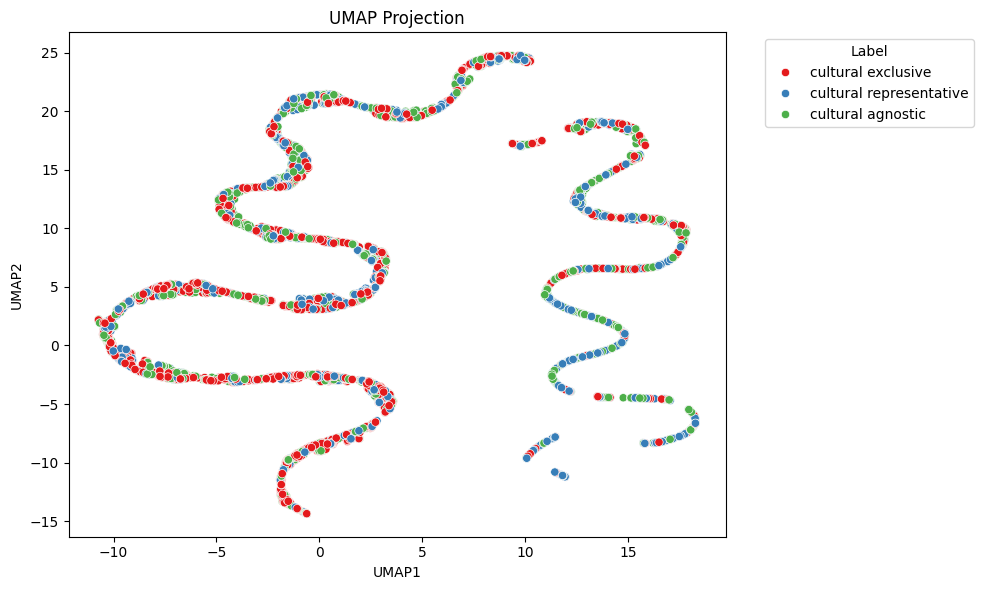

In [8]:
X = new_train
y = new_y


reducer = umap.UMAP(metric='euclidean', random_state=42, n_neighbors=15)
embedding = reducer.fit_transform(X)


# save UMAP in a dataframe
df = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])
df['label'] = y

# plot of the projection
plt.figure(figsize=(10, 6))
plot = sns.scatterplot(data=df, x='UMAP1', y='UMAP2', hue='label', palette='Set1')

plt.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('UMAP Projection')
plt.tight_layout()
plt.show()
